# Gekoppelde tanks met zoutoplossing
- Twee grote tanks met elk 100 liter vloeistof
- De vloeistof stroomt van tank A in tank B met een snelheid van 3 L/min 
- De vloeistof stroomt van tank B in tank A met een snelheid van 1 L/min 
- Een zoutoplossing met een concentratie van 0.2 kg/L stroomt met een snelheid van 6 L/min tank A in
- De zoutoplossing stroomt met een snelheid van 4 L/min tank A uit
- De zoutoplossing verlaat met een snelheid van 2 L/min tank B


In [1]:
import matplotlib.pyplot as plt
import numpy as np

In [20]:
def zout_oplossing(num_steps):
    #tank 1
    instroom_1 = 6
    uitstroom_1 = 4

    #tank 2
    uitstroom_2 = 2 

    een_naar_2 = 3
    twee_naar_1 = 1 

    zout_in = 0.2

    t_1 = np.zeros(num_steps + 1) 
    z_1 = np.zeros(num_steps + 1) 
    c_1 = np.zeros(num_steps + 1)  

    t_2 = np.zeros(num_steps + 1) 
    z_2 = np.zeros(num_steps + 1) 
    c_2 = np.zeros(num_steps + 1)
    
    t_1[0] = 100
    z_1[0] = 0
    c_1[0] = z_1[0] / t_1[0]
    
    t_2[0] = 100
    z_2[0] = 20
    c_2[0] = z_2[0] / t_2[0]
    
    times = [1]
    for step in range(num_steps):
        t_1[step+1] = t_1[step] + instroom_1 + twee_naar_1 - uitstroom_1 - een_naar_2
        t_2[step+1] = t_2[step] + een_naar_2 - uitstroom_2 - twee_naar_1
        
        z_1[step+1] = z_1[step] + (instroom_1 * zout_in) - (uitstroom_1 * c_1[step])
        z_2[step+1] = z_2[step] + (een_naar_2 * c_1[step]) - ((twee_naar_1 * c_2[step]) + (uitstroom_2 * c_2[step]))

        c_1[step+1] = z_1[step] / t_1[step]
        c_2[step+1] = z_2[step] / t_2[step]
        
        times.append(step)
    
    return times, c_1, c_2

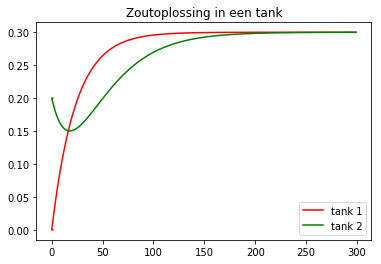

In [21]:
times, conc_tank_1, conc_tank_2 = zout_oplossing(300)

plt.plot(times,conc_tank_1,'r',label='tank 1')
plt.plot(times,conc_tank_2,'g',label='tank 2')
plt.title('Zoutoplossing in een tank')
plt.legend()
plt.show()